In [ ]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


In [ ]:
# Load initial wave
param = get_grid_param(12,4) # get_dense_param(40, 0.025)
    T = 50000.0
    @pack! param = T
    @unpack Nx = param
    loaded, f, t = quiet_load_last_pde(param)
#

In [12]:
# create new param
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["name"] = "wave_crash"
param["save_interval"] = 1.0
param["T"] = 200.0;


In [9]:
# create new f
f = vcat(f[Nx:-1:1,:],f[1:1,:],f[1:1:(Nx-1),:]);

In [ ]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=0.0)

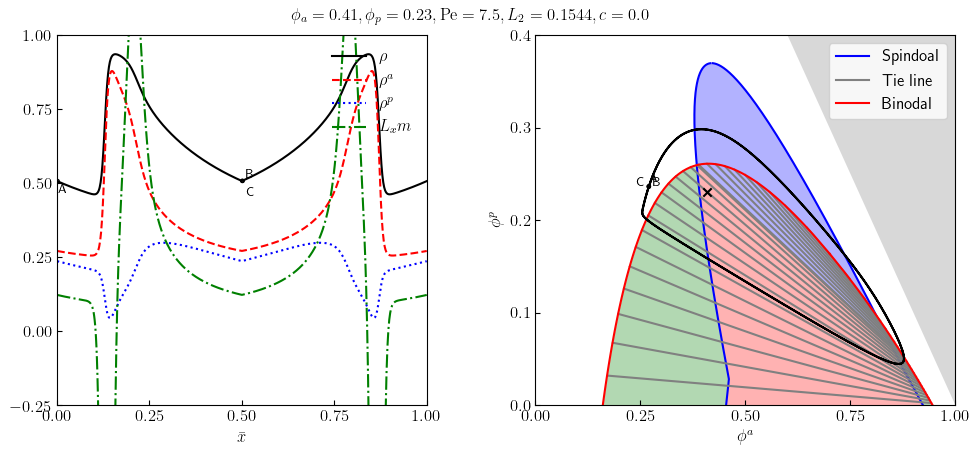

In [48]:
f2 = vcat(f[end:-1:1,:],f);
size(f2)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
param2 = param
param2["Nx"] = 2*param["Nx"]
show_f(axs,fig,12,param2,f2; c=0.0)
param2["name"] = "wave_crash"



In [1]:
f - vcat(f[2*Nx:-1:Nx,:],f[1:1,:],f[1:1:(Nx-1),:])

UndefVarError: UndefVarError: `f` not defined

In [62]:
t = 0.0
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt = param
t, f = time_step!(t, f; δt=δt, Nx=Nx, Lx=Lx, DT=DT, v0=v0, DR=DR);


In [114]:
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["name"] = "wave_crash"
param["save_interval"] = 1.0
param["T"] = 200.0

loaded, f, t = quiet_load_last_pde(param)

(true, [0.1810978812098816 0.18050440927028155 0.25469763444776444; 0.1810864931209502 0.1804866262200234 0.254690283018539; … ; 0.1811195353058308 0.18053885994449295 0.25471235063367675; 0.18110889530141466 0.18052182059440272 0.25470499021301446], 200.00000005244968)

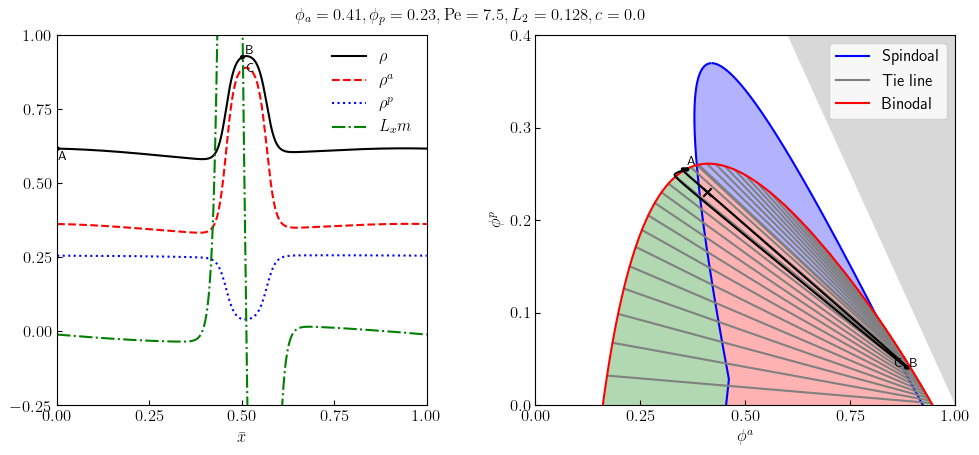

In [115]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=0.0)

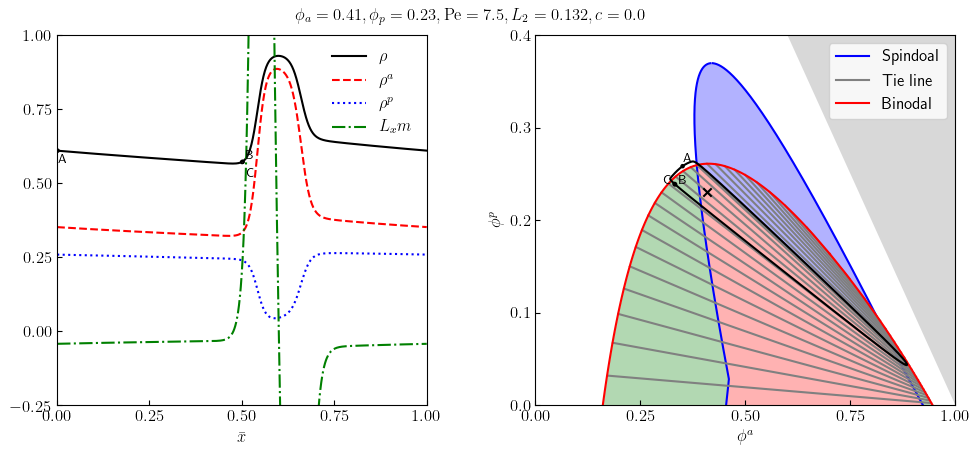

In [112]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=0.0)

In [41]:
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["name"] = "wave_crash_2"
param["save_interval"] = 10.0
param["T"] = 10.0

loaded, f, t = quiet_load_last_pde(param);
print(loaded)

# using PyPlot, LaTeXStrings
# fig, axs = subplots(1,2,figsize=(10,5))
# rc("text", usetex=true)
# show_f(axs,fig,12,param,f; c=0.0)

true

In [42]:
maximum(abs.(f - f[end:-1:1,:]))

0.0

In [9]:
t_saves, f_saves = load_compress_pde(param)

err = []
for f in f_saves
    push!(err,maximum(abs.(f - f[end:-1:1,:])))
end

err

full load
saved


2-element Vector{Any}:
 0.0
 0.36050863872439015

In [10]:
t_saves

2-element Vector{Float64}:
 10.0
 20.0000099991999

In [17]:
f = f_saves[1]
t = 0.0
s = 0.00001
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt = param
# while t < s
#     t, f = time_step!(t, f; δt=δt, Nx=Nx, Lx=Lx, DT=DT, v0=v0, DR=DR);
# end
# t, f = time_step!(t, f; δt=δt, Nx=Nx, Lx=Lx, DT=DT, v0=v0, DR=DR);
# maximum(abs.(f - f[end:-1:1,:]))
# f - f[end:-1:1,:]
ρ= sum(f; dims =2)[:,1];
U     = U_velocities(f,ρ; Nx=Nx, Lx=Lx, DT=DT, v0=v0);
mobf  = mob(f,ρ);
F     = F_fluxes(U, mobf; Nx=Nx);

In [40]:
F

800×3 Matrix{Float64}:
 -0.344646  0.377628   0.0169895
 -0.344998  0.37788    0.016931
 -0.34535   0.378131   0.0168728
 -0.3457    0.378381   0.0168147
 -0.346049  0.378631   0.0167569
 -0.346397  0.37888    0.0166993
 -0.346744  0.379129   0.0166419
 -0.347089  0.379377   0.0165847
 -0.347434  0.379624   0.0165277
 -0.347777  0.379871   0.0164709
  ⋮                   
 -0.359471  0.366074  -0.0108464
 -0.359194  0.365751  -0.0108852
 -0.358917  0.365427  -0.010924
 -0.358639  0.365102  -0.010963
 -0.35836   0.364775  -0.0110021
 -0.358081  0.364448  -0.0110413
 -0.357801  0.36412   -0.0110807
 -0.35752   0.36379   -0.0111201
 -0.350927  0.370566   0.00293976

In [24]:
maximum(abs.(U  - U[end:-1:1,:]))

25.28661413779103

In [35]:
logtol = log(1e-10);
    
eθ = reshape([-1 1 0],1,3) 
    
logmf = map(x -> (x>0 ? log(x) : logtol), f);
p_rho = p.(ρ) #functon p is labelled W in the pdf
    
D1 = midpoint_bond_diff_2d(logmf .+ p_rho; Nx=Nx, Lx=Lx);
D2 = midpoint_bond_av_1d(coeff_mag_s(f,ρ); Nx =Nx ) ;


In [48]:
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["name"] = "wave_crash_3"
param["save_interval"] = 10.0

loaded, g, t = quiet_load_last_pde(param)


(true, [0.13219093412511995 0.13829117959431425 0.23599995633084084; 0.13205516671920917 0.1381371634458918 0.23559682367516888; … ; 0.13205516671920917 0.1381371634458918 0.23559682367516888; 0.13219093412511995 0.13829117959431425 0.23599995633084084], 10.0)

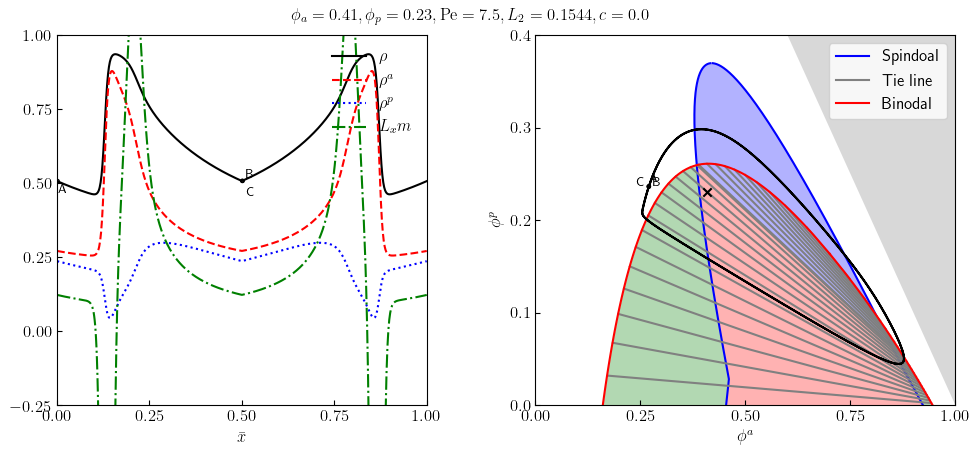

0.0

In [25]:
# f = f_saves[1]
g = copy(f)
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=0.0)
maximum(abs.(f - f[end:-1:1,:]))


In [23]:
param["save_interval"] = 1e-10
run_current_pde(param, 1e-10, f,10.0)

(10.000009999578477, [0.1321884826768989 0.13828829401825282 0.23599433669176959; 0.13205536861553574 0.13813700205129043 0.23559684705281767; … ; 0.13205511517851945 0.13813723444296658 0.23559683944336293; 0.13218835811441573 0.13828840810611373 0.23599433262966163])

In [18]:
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["name"] = "wave_crash_3"
param["save_interval"] = 10.0
param["T"] = 50.0


loaded, f, t = quiet_load_last_pde(param)

(true, [0.21701568657257453 0.21701568657257453 0.20562329005398758; 0.21701505333548782 0.21701505333548782 0.20562457147769722; … ; 0.21701505333548782 0.21701505333548782 0.20562457147769722; 0.21701568657257453 0.21701568657257453 0.20562329005398758], 50.000000004459054)

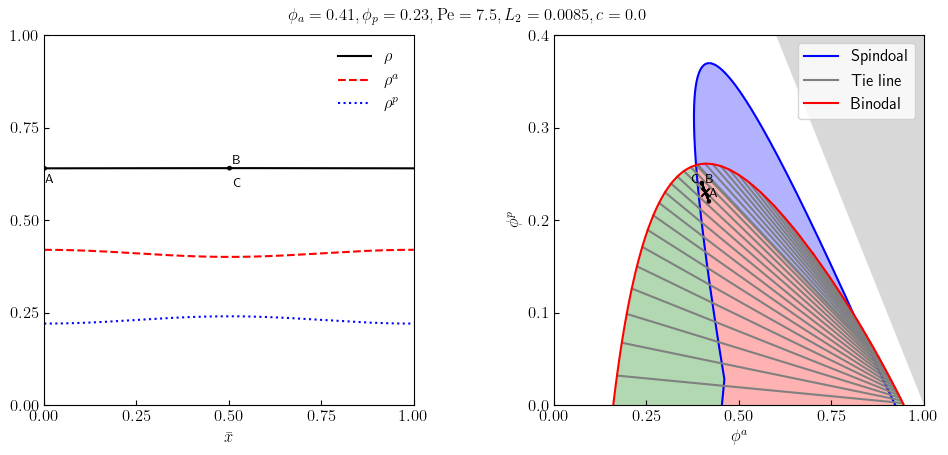

0.0

In [17]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=0.0)
maximum(abs.(f - f[end:-1:1,:]))

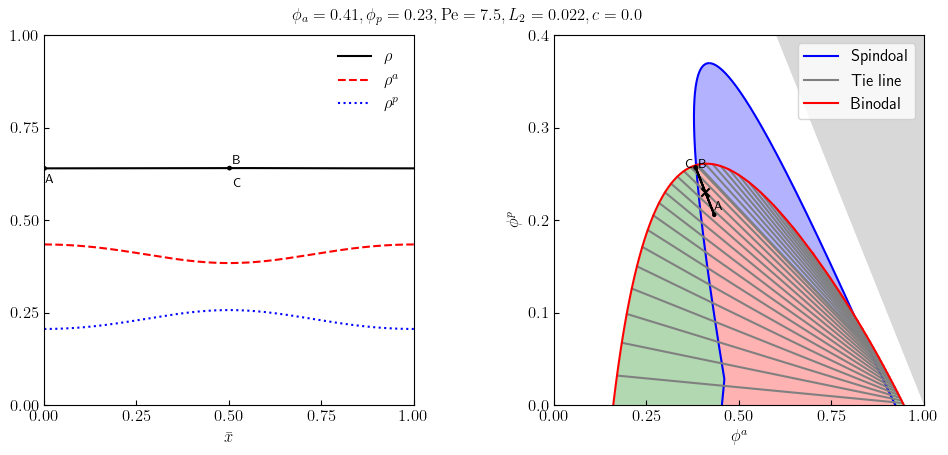

0.0

In [19]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=0.0)
maximum(abs.(f - f[end:-1:1,:]))

In [76]:
function dist_from_unifs(f_saves, param)
    return [dist_from_unif(f, param) for f in f_saves]
end

dist_from_unifs (generic function with 1 method)

In [70]:
param = get_grid_param(12,4)
param["Nx"] = 10*param["Nx"]
param["Lx"] = 2*param["Lx"]
param["Δx"] = param["Lx"]/param["Nx"]
param["name"] = "lin_stab_test_12"
param["save_interval"] = 1e-4
param["T"] = 100*param["save_interval"]
param["δ"] = 1e-6
param

Dict{String, Any} with 19 entries:
  "T"             => 0.01
  "save_interval" => 0.0001
  "δ"             => 1.0e-6
  "δt"            => 1.0e-5
  "name"          => "lin_stab_test_12"
  "save_on"       => true
  "DT"            => 1.0
  "Lx"            => 40.0
  "N"             => 100
  "DR"            => 1.0
  "Δx"            => 0.01
  "Nx"            => 4000
  "ϕp"            => 0.23
  "pert"          => "lin"
  "ϕa"            => 0.41
  "Ly"            => 0.5
  "N₁"            => 2000
  "N₂"            => 50
  "v0"            => 7.5

In [44]:
run_new_pde_sym(param)
# run_new_pde(param)

(0.01000999999999976, [0.20500000989462613 0.20500000906272184 0.2299999987788793; 0.2050000098945286 0.20500000906263247 0.22999999877889132; … ; 0.2050000098945286 0.20500000906263247 0.22999999877889132; 0.20500000989462613 0.20500000906272184 0.2299999987788793])

In [45]:
t_saves, f_saves = load_compress_pde(param);
norm_saves = dist_from_unifs(f_saves, param);

full load
saved


In [13]:
ω, λ, λv = lin_pert_values(param)

(0.15707963267948966, 0.0020727395396344553 + 0.013864249671221148im, ComplexF64[0.6736357286311513 + 0.1607501841777662im, 0.7196903413918511 + 0.0im, -0.03215872756262593 + 0.03722784102289331im])

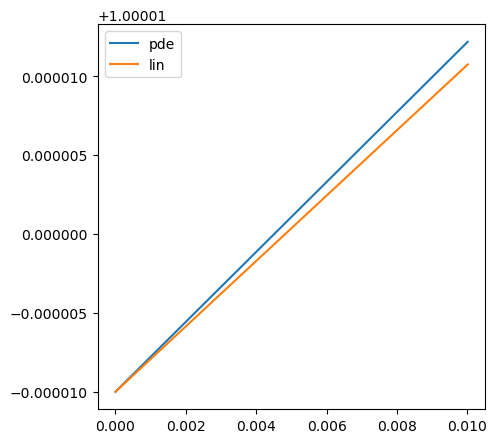

In [40]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
ax.plot(t_saves,norm_saves./norm_saves[1]; label= "pde")
ax.plot(t_saves,exp.(λ*t_saves); label= "lin")
ax.legend()
display(fig)

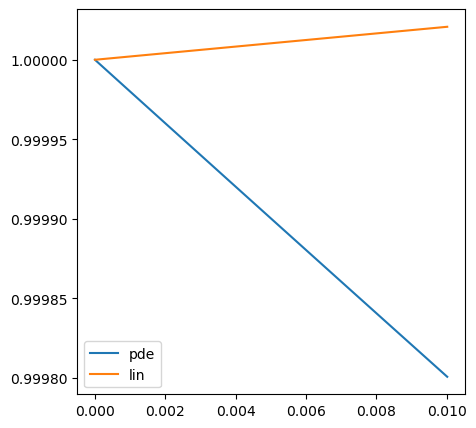

In [46]:
fig, ax = subplots(1,1,figsize=(5,5))
ax.plot(t_saves,norm_saves./norm_saves[1]; label= "pde")
ax.plot(t_saves,exp.(λ*t_saves); label= "lin")
ax.legend()
display(fig)

In [79]:
@unpack DT, v0, DR, Lx, ϕa, ϕp = param
        ω = 2*π/Lx;
        Pe = v0;
        ϕ  = ϕa + ϕp;
        ϕ0 = 1- ϕ;
        Ds = self_diff(ϕ);
        Dsp = self_diff_prime(ϕ);
        Dd = (1-Ds)/ϕ
        s = Dd - 1
        W = [-ω^2             0          -im*ω*Pe*ϕ0; 
            -ω^2*ϕa*Dd      -ω^2*Ds     -im*ω*Pe*(ϕa*s+Ds); 
            -im*ω*Pe*ϕa*Dsp -im*ω*Pe*Ds -ω^2*Ds-2         ]
        values,vectors = eigen(W)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
3-element Vector{ComplexF64}:
   -2.0403695574578693 + 3.469446951953614e-18im
  0.002072739539634454 - 0.013864249671221147im
 0.0020727395396344553 + 0.013864249671221148im
vectors:
3×3 Matrix{ComplexF64}:
 1.30104e-18+0.202657im   0.673636-0.16075im      0.673636+0.16075im
         0.0+0.176737im    0.71969+0.0im           0.71969+0.0im
    0.963169+0.0im       0.0321587+0.0372278im  -0.0321587+0.0372278im

In [47]:
function perturb_pde!(f::Matrix{Float64}, param::Dict{String, Any})
    @unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt, δ, pert = param
    
    if pert == "rand"
        pertf = 2*rand(Nx,3) .-1
    elseif pert == "double"
        ω, value, vector = lin_pert_values(param)

        wave   = exp.((1:Nx)*(im*2*π/Nx))
        pertf  = zeros(Nx,3)

        pertf[:,1] = real.( wave*(vector[1]- vector[2])/2 )
        pertf[:,2] = real.( wave*(vector[1]+ vector[2])/2 ) 
        pertf[:,3] = real.( wave*(vector[3]) )

        pertf += pertf[Nx:-1:1,:]
    else
        ω, value, vector = lin_pert_values(param)

        wave   = exp.((1:Nx)*(im*2*π/Nx))
        pertf    = zeros(Nx,3)

        pertf[:,1] = real.( wave*(vector[2]- vector[3])/2 )
        pertf[:,2] = real.( wave*(vector[2]+ vector[3])/2 ) 
        pertf[:,3] = real.( wave*(vector[1]-vector[2]) )
    end

    c = norm(pertf)/sqrt(Nx)

    max_pert = maximum(δ*sum(pertf;dims=3)/c)
    if max_pert>(1-(ϕa+ϕp))
        sf = (1-(ϕa+ϕp))/max_pert
    elseif max_pert>(ϕa+ϕp)
        sf = ((ϕa+ϕp))/max_pert
    else
        sf = 1
    end

    f += sf*δ*pertf/c

    return f
end

perturb_pde! (generic function with 1 method)

In [110]:
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt = param
f = initiate_uniform_pde(ϕa, ϕp, Nx);
f = perturb_pde!(f, param);
# f = (f + f[Nx:-1:1,:])/2
dist_from_unif(f, param)
argmax(f[:,1]+f[:,2]), argmax(f[:,1]+f[:,2]+f[:,3]), argmax(f[:,1]-f[:,2])


(4000, 3851, 546)

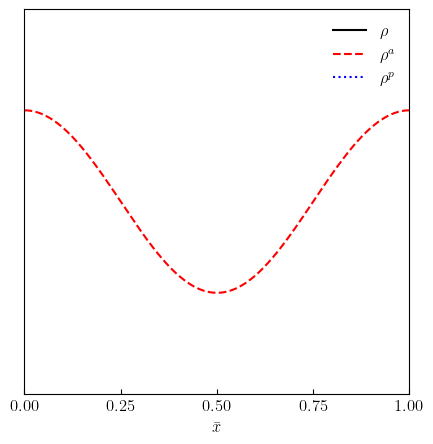

In [97]:
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δ = param
fig, ax = subplots(1,1,figsize=(10,5))
profile_f(ax,12,param,f);
ϕ = ϕa+ ϕp
ax.set_aspect(1/8/δ)
ax.axis([0,1,ϕa-4*δ,ϕa+4*δ])
display(fig)

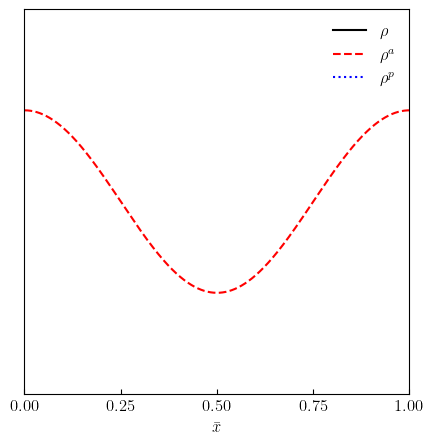

In [100]:
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δ = param
fig, ax = subplots(1,1,figsize=(10,5))
profile_f(ax,12,param,f);
ϕ = ϕa+ ϕp
ax.set_aspect(1/8/δ)
ax.axis([0,1,ϕa-4*δ,ϕa+4*δ])
display(fig)

In [80]:
t, f = time_step!(0.0, f; δt=δt, Nx=Nx, Lx=Lx, DT=DT, v0=v0, DR=DR);
dist_from_unif(f, param)

9.528685066564353e-7

In [11]:
param = get_grid_param(12,4)

param["ϕa"] = 0.3
param["ϕp"] = 0.6
param["Lx"] = 2.0
param["v0"] = 20.0
param["Δx"] = param["Lx"]/param["Nx"]
param


Dict{String, Any} with 19 entries:
  "T"             => 2000.0
  "save_interval" => 20.0
  "δ"             => 0.01
  "δt"            => 1.0e-5
  "name"          => "soliton_grid"
  "save_on"       => true
  "DT"            => 1.0
  "Lx"            => 2.0
  "N"             => 100
  "DR"            => 1.0
  "Δx"            => 0.005
  "Nx"            => 400
  "ϕp"            => 0.6
  "pert"          => "lin"
  "ϕa"            => 0.3
  "Ly"            => 0.5
  "N₁"            => 2000
  "N₂"            => 50
  "v0"            => 20.0

In [57]:
# ω, λ, λv = lin_pert_values(param)

function relamb(x,y; L = 2.0, v = 7.5, param = param)
    param["ϕa"] = x
    param["ϕp"] = y
    param["Lx"] = L
    param["v0"] = v
    ω, λ, λv = lin_pert_values(param)
    return real(λ)
end
relamb(0.3,0.6;L = 20.0, v = 20.0),relamb(0.3,0.6;L = 2.0, v = 20.0)


(0.12818335615136606, 0.8788467078709905)

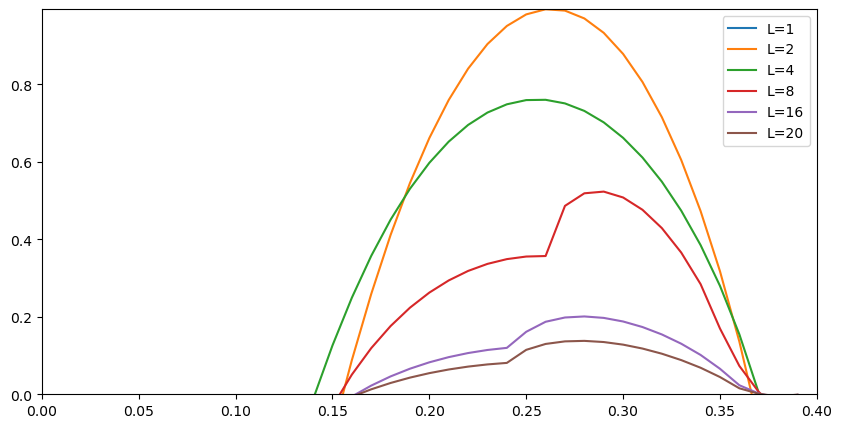

In [63]:
using PyPlot
fig, ax = subplots(1,1,figsize=(10,5))
ϕp = 0.6
v = 20.0
xs = collect(0.01:0.01:(1-ϕp-0.01))
ys = fill(ϕp,length(xs))
ax_lim = 0
for L in [1,2,4,8,16,20]
    λs = relamb.(xs,ys; L=L, v=v)
    ax_lim = max(ax_lim, maximum(λs))
    ax.plot(xs,λs; label = "L=$(L)")
end
ax.axis([0,1-ϕp,0.0,ax_lim])
ax.legend()
display(fig)


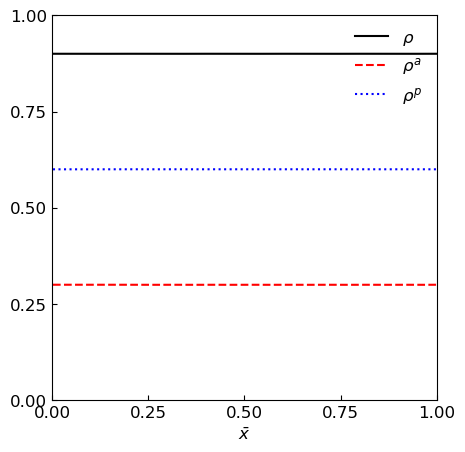

In [82]:
param = get_grid_param(12,4)
param["ϕa"] = 0.3
param["ϕp"] = 0.6
param["Lx"] = 20.0
param["v0"] = 20.0
param["δ"] = 0.0001
param["Δx"] = param["Lx"]/param["Nx"]
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt,δ = param
f = initiate_uniform_pde(ϕa, ϕp, Nx);
f = perturb_pde!(f, param; wave_num = 10);
fig, ax = subplots(1,1,figsize=(10,5))
profile_f(ax,12,param,f);
ϕ = ϕa + ϕp
# ax.set_aspect(1/8/δ)
# ax.axis([0,1,ϕa-4*δ,ϕa+4*δ])
ax.axis([0,1,0,1])
display(fig)

In [129]:
# dt = 10.0
# param["save_interval"] = 1e-2
param["T"] = 80.0
# run_current_pde(param,dt, f,0.0)
t_saves, f_saves = load_compress_pde(param);
norm_saves = dist_from_unifs(f_saves, param);

full load
saved


In [9]:
param = get_grid_param(12,4)
param["ϕa"] = 0.3
param["ϕp"] = 0.6
param["Lx"] = 20.0
param["v0"] = 20.0
param["δ"] = 0.0001
param["Δx"] = param["Lx"]/param["Nx"]
dt = 40.0
f = f_saves[end]
t = t_saves[end]
param["save_interval"] = 1e-2
param["T"] = 80.0
run_current_pde(param,dt, f,t)
t_saves, f_saves = load_compress_pde(param);
norm_saves = dist_from_unifs(f_saves, param);
# f = f_saves[end]
# t = t_saves[end]

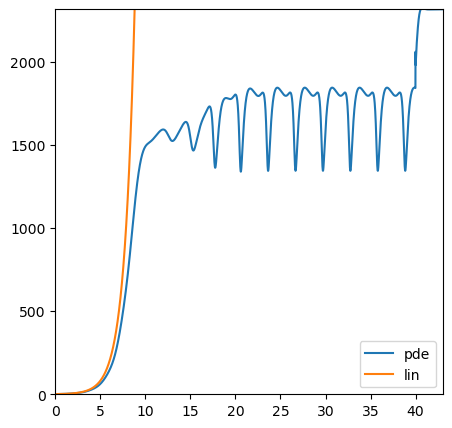

In [6]:
using PyPlot 
fig, ax = subplots(1,1,figsize=(5,5))
ω, λ, λv = lin_pert_values(param;wave_num =10,wave_choice=3)
ax.plot(t_saves,norm_saves./norm_saves[1]; label= "pde")
ax.plot(t_saves,exp.(real(λ)*t_saves); label= "lin")
ax.legend()
ax.axis([0,t_saves[end],0,norm_saves[end]./norm_saves[1]])
display(fig)

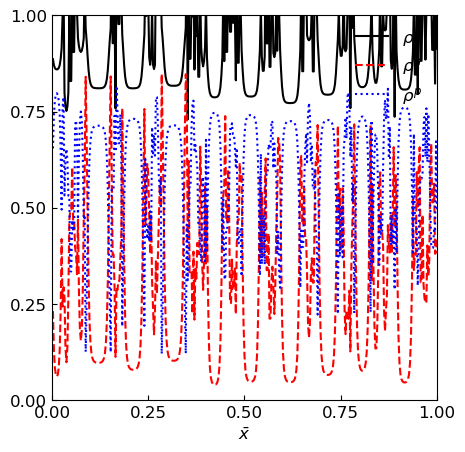

In [7]:
f = f_saves[end]
fig, ax = subplots(1,1,figsize=(10,5))
profile_f(ax,12,param,f);
# ϕ = ϕa + ϕp
# ax.set_aspect(1/8/δ)
# ax.axis([0,1,ϕa-4*δ,ϕa+4*δ])
display(fig)

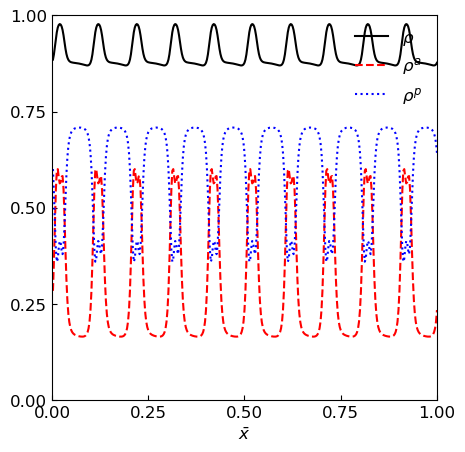

In [120]:
f = f_saves[2000]
fig, ax = subplots(1,1,figsize=(10,5))
profile_f(ax,12,param,f);
# ϕ = ϕa + ϕp
# ax.set_aspect(1/8/δ)
# ax.axis([0,1,ϕa-4*δ,ϕa+4*δ])
display(fig)

full load
saved


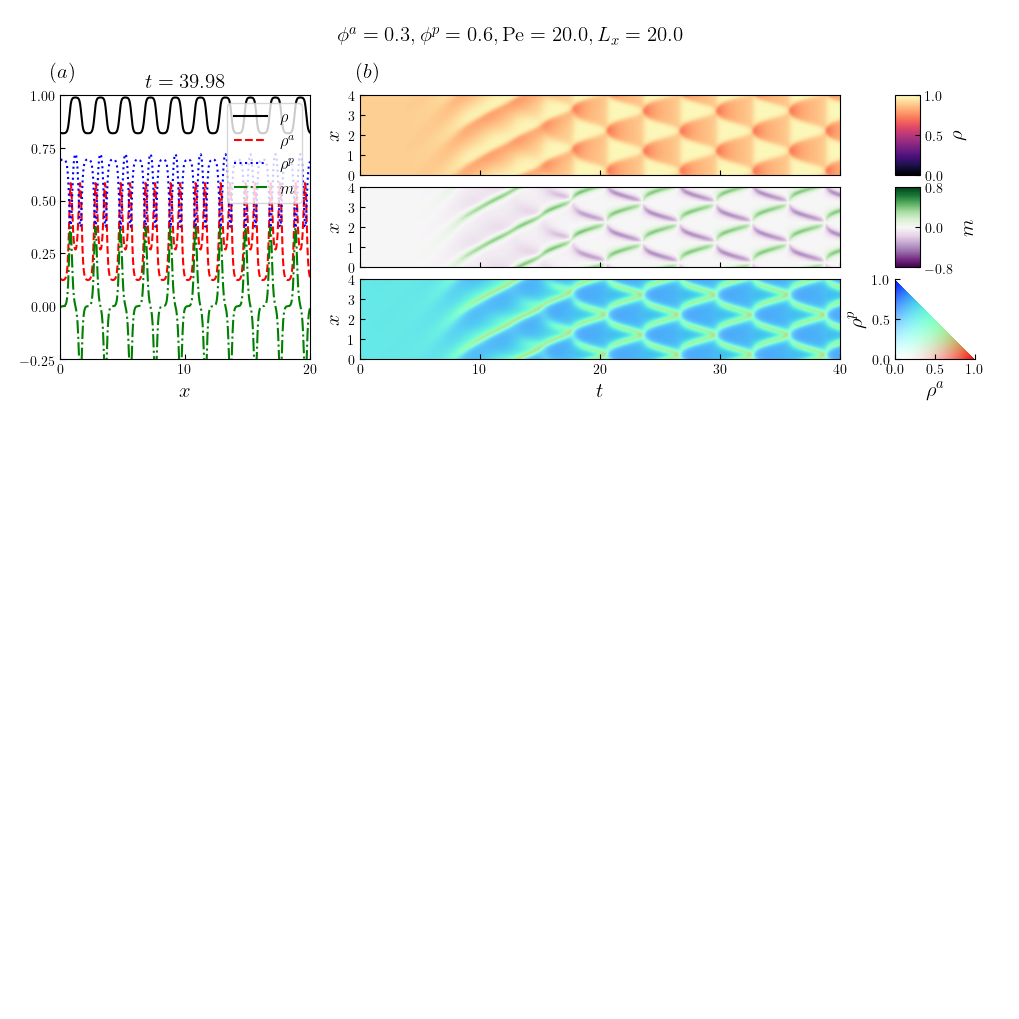

In [131]:
@unpack Nx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param);
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

t_max = maximum(ts)
@unpack Lx = param
    rhomax  = 1.0
    rhomin  = 0.0
    mag_lim = 0.8
    height_1 = 0.08
    width_1  = 0.48 #2*0.365
    side_gap_1  = 0.35
    bottom_gap_1  = 0.65
    gap = 0.012

    cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
    cbar_width = 0.1
    cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
    cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


    height_2 = 0.175
    width_2  = height_2
    side_gap_2  = 0.1
    bottom_gap_2  = bottom_gap_1
    gap_2 = 0.06

    t_stamp_x = 0.03
    t_stamp_y = 0.05

    width_3 = 0.25
    start_3 = 0.05

    font = 15

    sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:1:Lx/5)
        # ax.set_yticklabels(["0","10","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx/5])
        ax.set_aspect((5*t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = font)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:1:Lx/5)
        # ax.set_yticklabels(["0","10","20"])
        ax.axis([0,t_max, 0, Lx/5])
        ax.set_aspect((5*t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:1:Lx/5)
        # ax.set_yticklabels(["0","10","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx/5])
        ax.set_aspect((5*t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    #     for (i,(ts, df)) in enumerate(zip(dts, dfs))
    #         ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
    #         t_end = ts[end]
    #         t_start = ts[1]
    #         t_max = t_end -t_start
    #         ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # if i ==1
    #         #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
    #         #     ax.plot(ts[2:end], smooth_df; color = "black")
    #         # else
    #         #     ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # end
    #         #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
    #         #ax.get_xaxis().set_ticks([])
    #         ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
    #         ax.get_yaxis().set_ticks(0:0.04:0.04)
    #         ax.axis([t_start,t_end, 0, 0.04])
    #         ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
    #         ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
    #         ax.set_xlabel(L"t", fontsize = font)
    #         ax.tick_params(labelbottom = true, direction = "in")
    # end
# add end plot  
    frame = length(ts)-1
    ax = fig.add_axes([start_3, bottom_gap_2, width_3, 3*height_1+2*gap])
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3];
    color = "black", linestyle = "-", label = L"\rho")
    ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
    color = "red", linestyle = "--", label = L"\rho^a")
    ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
    color = "blue", linestyle = ":",label = L"\rho^p")
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
    color = "green", linestyle = "-.", label = L"m")
    

    latex_string = latexstring("\$ t = $(d2(ts[frame]))\$")
    ax.set_title(latex_string, fontsize = font)
    ax.get_xaxis().set_ticks(0:10.0:Lx)
    ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
    # ax.set_xlabel(L"x", fontsize = 15)
    #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
    ax.set_aspect((3*height_1+2*gap)*(Lx/(1.25))/(width_3))
    ax.axis([0,Lx,-0.25,1.0])
    ax.tick_params(direction = "in")
    ax.legend(loc= "upper right", fontsize = 12)
    ax.set_xlabel(L"x", fontsize = 15)

# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_2, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = font)
    ax.set_ylabel(L"\rho^p",fontsize = font, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=font,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=font,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=font)
# labels
    #latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(L"(a)", (start_3, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
    ax.annotate(L"(b)", (side_gap_1, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
display(fig)
fig_name = "pde_plot"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [ ]:
dt = 40.0
f = f_saves[end]
t = t_saves[end]
param["pert"] = "rand"
param["δ"] = 0.1
f = perturb_pde!(f, param);
param["save_interval"] = 1e-2
param["T"] = param["T"]+dt
# run_current_pde(param,dt, f,t)
t_saves, f_saves = load_compress_pde(param);
norm_saves = dist_from_unifs(f_saves, param);